# Introduction to Astrometry - Exercises

### Dora Föhring, University of Hawaii Institute for Astronomy

Aim: To measure the position and uncertainty of a Near Earth Asteroid

## 0. Prerequisites

If you do not have `astroquery` installed, you will need to add it to your conda environment (from the command line):

    conda install -c astropy astroquery

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import wcs
from astroquery.gaia import Gaia
## make matplotlib appear in the notebook rather than in a new window
%matplotlib inline

Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


### 0.1 Directory Set up & Display Image

In [5]:
datadir = '/Users/ioanaciuca/Desktop/MasterFolder/LSSTC/LSSTC-DSFP-Sessions/Session5/Day2/psf_files/'
objname  = '2016HO3'

In [6]:
def plotfits(imno):
    img = fits.open(datadir+objname+'_{0:02d}.fits'.format(imno))[0].data

    f = plt.figure(figsize=(10,12))
    im = plt.imshow(img, cmap='hot')
    im = plt.imshow(img[480:560, 460:540], cmap='hot')
    plt.clim(1800, 2800)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.savefig("figure{0}.png".format(imno))
    plt.show()

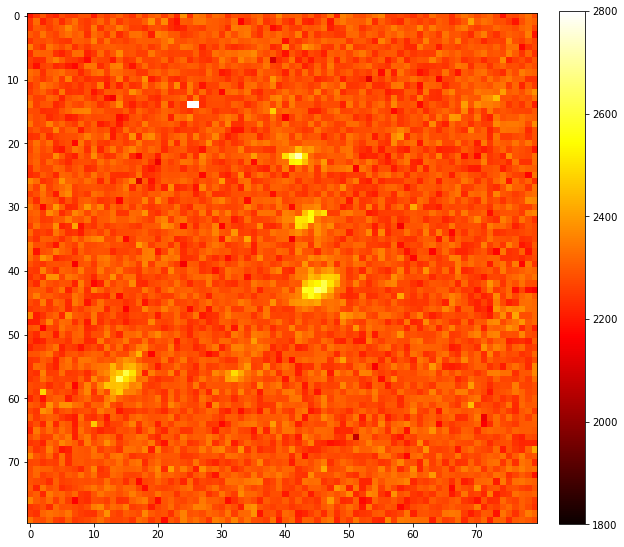

In [7]:
numb = 1 
plotfits(numb)

## 1. Centroiding on Images

Write a text file with image centers.
Write code to open each image and extract centroid position from previous exercise.
Save results in a text file.

In [8]:
centers = np.array([[502,501], [502,501]])
np.savetxt('centers.txt', centers, fmt='%i')
centers = np.loadtxt('centers.txt', dtype='int')

In [9]:
searchr = 5

### 1.1 Center of Mass

In [10]:
def cent_weight(n):
    """
    Assigns centroid weights
    """
    wghts=np.zeros((n),np.float)
    for i in range(n):
        wghts[i]=float(i-n/2)+0.5
    return wghts

def calc_CoM(psf, weights):
    """
    Finds Center of Mass of image
    """
    cent=np.zeros((2),np.float)
    temp=sum(sum(psf) - min(sum(psf) ))
    cent[1]=sum(( sum(psf) - min(sum(psf)) ) * weights)/temp
    cent[0]=sum(( sum(psf.T) - min(sum(psf.T)) ) *weights)/temp
    return cent

In [11]:
centlist = []
for i, center in enumerate(centers):
    image = fits.open(datadir+objname+'_{0:02d}.fits'.format(i+1))[0].data
    searchbox = image[center[0]-searchr : center[0]+searchr, center[1]-searchr : center[1]+searchr]
    boxlen = len(searchbox)
    weights = cent_weight(boxlen)
    cen_offset = calc_CoM(searchbox, weights)
    centlist.append(center + cen_offset)

In [12]:
print(centlist[0])

[ 502.05095604  501.91082726]


## 2. Identifying Stars in the Field

#### Ex 1. Write code to identify stars in the field. 

One way to do it would be:  
Create a new image using an mapping arc sinh that captures the full dynamic range effectively.  
Locate lower and upper bounds that should include only stars.  
Refine the parameters to optimize the extraction of stars from background.

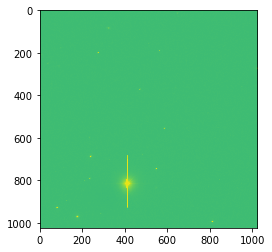

In [16]:
no = 1
image = fits.open(datadir+objname+'_{0:02d}.fits'.format(no))[0].data

plt.imshow(np.arcsinh(image))

#### 1.a. Create a new image using an mapping arc sinh that captures the full dynamic range effectively. Consider Gaussian smoothing to get rid of inhomogineties in the image. 

8.4333811

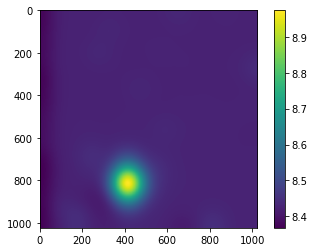

In [120]:
## Some functions you may want to use
import skimage.exposure as skie
from scipy.ndimage import gaussian_filter

image_t = np.arcsinh(image)
filtered_image = gaussian_filter(image_t, sigma = 50)

plt.imshow(filtered_image)
plt.colorbar()
min(filtered_image[0])

max(filtered_image[0])

In [ ]:
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###

#### 1.b. Create a new image that is scaled between the lower and upper limits for displaying the star map.  
Search the arcsinh-stretched original image for local maxima and catalog those brighter than a threshold that is adjusted based on the image.

In [ ]:
filtered_image[]

In [99]:
N = 1024
x_array =  np.arange(0, 1023, 1)
y_array = np.arange(0, 1023, 1)
func = np.asarray(map(lambda x,y: filtered_image[x, y] > 8.5, x_array, y_array))
filtered_image[func == True]
indx_x = []
indx_y = []
for x in range(1024):
    for y in range(1024):
        if filtered_image[x, y] > 8.5:
            indx_x.append(x)
            indx_y.append(y)
        

In [113]:
x_arr = np.array(indx_x)
y_arr = np.array(indx_y)

len(x_arr)

22732

In [122]:
## Consider using
import skimage.morphology as morph

lm1 = morph.local_maxima(filtered_image)
x1, y1 = np.where(lm1.T == True)

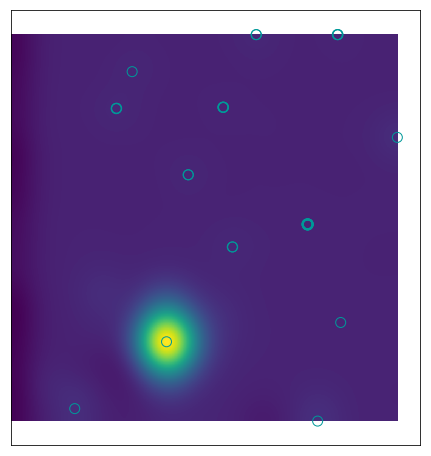

In [141]:
# Creating figure to show local maximum detection 
# rate success
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
ax.imshow(filtered_image)
ax.scatter(x1, y1, s=100, facecolor='none', edgecolor='#009999') 

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

Plot image with identified stars and target

In [ ]:
f = plt.figure(figsize=(10,12))
plt.imshow(opt_img, cmap='hot')
plt.colorbar(fraction=0.046, pad=0.04)
plt.scatter(x2, y2, s=80, facecolors='none', edgecolors='r')
plt.scatter(502.01468185, 501.00082137, s=80, facecolors='none', edgecolors='y' )
plt.show()

## 3. Converting pixel coordinates to WCS

In [125]:
def load_wcs_from_file(filename, xx, yy):
    # Load the FITS hdulist using astropy.io.fits
    hdulist = fits.open(filename)

    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(hdulist[0].header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

    # Print out all of the settings that were parsed from the header
    w.wcs.print_contents()

    # Coordinates of interest.
    # Note we've silently assumed a NAXIS=2 image here
    targcrd = np.array([centlist[0]], np.float_)
    
    starscrd = np.array([xx, yy], np.float_)

    # Convert pixel coordinates to world coordinates
    # The second argument is "origin".
    world = w.wcs_pix2world(starscrd.T, 0)

    return w, world

Find position of Asteroid in WCS

In [126]:
wparams, scoords = load_wcs_from_file(datadir+objname+'_{0:02d}.fits'.format(1), x1, y1)

In [127]:
print(scoords)

[[ 193.39200491   33.92146325]
 [ 193.37577526   33.82430086]
 [ 193.3757753    33.82442308]
 [ 193.37562814   33.82430089]
 [ 193.36959358   33.81244637]
 [ 193.35621212   33.89983646]
 [ 193.34782099   33.84581428]
 [ 193.34767383   33.84581428]
 [ 193.33428666   33.82393537]
 [ 193.33413954   33.82393535]
 [ 193.33413952   33.82405757]
 [ 193.33399242   33.82393533]
 [ 193.33059756   33.86915701]
 [ 193.33045036   33.86915699]
 [ 193.32134817   33.80046625]
 [ 193.32120109   33.80046622]
 [ 193.30145629   33.8616931 ]
 [ 193.30145622   33.86181533]
 [ 193.30145615   33.86193755]
 [ 193.3013091    33.86169304]
 [ 193.30130903   33.86181527]
 [ 193.30130896   33.86193749]
 [ 193.30130889   33.86205971]
 [ 193.30116192   33.86169298]
 [ 193.30116184   33.86181521]
 [ 193.30116177   33.86193743]
 [ 193.3011617    33.86205965]
 [ 193.30101473   33.86169292]
 [ 193.30101466   33.86181515]
 [ 193.30101458   33.86193737]
 [ 193.29729457   33.92549132]
 [ 193.28972559   33.80045452]
 [ 193.2

In [128]:
wparams, tcoords = load_wcs_from_file(datadir+objname+'_{0:02d}.fits'.format(1), np.array([centlist[0][0]]), np.array([centlist[0][1]]))

In [129]:
print(tcoords)

[[ 193.34295562   33.86181425]]


## 3. Matching

### 3.1 Get astrometric catalog

In [130]:
job = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS', 193.34, 33.86, 0.08))=1;" \
, dump_to_file=True)

print (job)

Launched query: 'SELECT * FROM gaiadr1.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS', 193.34, 33.86, 0.08))=1;'
Retrieving async. results...
Jobid: 1516811183740O
Phase: None
Owner: None
Output file: async_20180124112623.vot
Results: None


In [131]:
r = job.get_results()
print (r['source_id'], r['ra'], r['dec'])
print(type(r['ra']))

     source_id     
-------------------
1515770241672792704
1515751378176545408
1515769623197411456
1515769378384464768
1515751236442583296
1515751270802228736
1515769206585764480
1515751305162058752
1515764258783437696
1515751373881536256
                ...
1515769240945469952
1515750995924397696
1515750995924397824
1515763880826316416
1515762850034149376
1515757936591587328
1515762987473110656
1515757558634354304
1515756325978649728
1515762678235367040
1515769309667939712
Length = 36 rows         ra        
       deg        
------------------
193.31962507821265
193.34217139504767
193.35493968928526
193.38327685694409
193.38505967616862
193.33814860467297
193.35475877015173
193.35034321839012
193.26059009959198
193.34280810593697
               ...
193.36581521621554
193.35734586149439
193.25293663775915
193.26330158841628
193.40686364810929
193.28605697007046
193.40878840515927
  193.432503454244
193.29670644446338
193.39456770646817
Length = 36 rows        dec        
       deg 

## 3.2 Perform Match

Convert Gaia WCS coordinates to pixels

In [134]:
ra  = np.array(r['ra'])
dec = np.array(r['dec'])
ra
dec

array([ 33.92006069,  33.83026268,  33.93622313,  33.92374324,
        33.83176866,  33.80429056,  33.89007982,  33.82641416,
        33.88169951,  33.83067515,  33.89825543,  33.88230488,
        33.81757199,  33.89102541,  33.90360253,  33.80901954,
        33.78414525,  33.87493509,  33.8077218 ,  33.85265207,
        33.79345639,  33.874842  ,  33.84061392,  33.9284367 ,
        33.86632339,  33.90668256,  33.79433383,  33.79348664,
        33.88607805,  33.82194289,  33.91623737,  33.85115765,
        33.89738946,  33.8386884 ,  33.81197806,  33.90491998])

In [137]:
xpix, ypix = wparams.wcs_world2pix(ra, dec, 0)
print(xpix, ypix)

[  660.4122781    507.40229839   420.6511866    228.26321742   215.91346409
   534.77094443   421.86715572   451.86233718  1061.50293019   503.07456968
   488.01743245   -77.78268601   266.09031966   181.05622512   177.96382591
   588.22400026   336.97049599   527.36593623   800.37441076   412.82718347
   693.90344809   631.92623416   963.81871286   750.75480954   730.06432983
   352.317584     346.66454714   404.25085907  1113.45457333  1043.50442304
    68.09645988   888.67880364    54.94189407  -106.49096273   816.48736532
   151.54365856] [  978.50390533   243.7619915   1110.70902169  1008.6335966    256.11795399
    31.26566928   733.1725557    212.27127953   664.87922593   247.13636637
   800.06491398   669.75392767   139.94877296   740.95828958   843.86328088
    69.96636095  -133.5575653    609.26575221    59.42442844   426.94580525
   -57.33893528   608.5243835    328.64447976  1047.06893241   538.85997218
   869.01878262   -50.19770477   -57.13492418   700.75154638   175.9450

Plot Gaia stars over identified stars in image

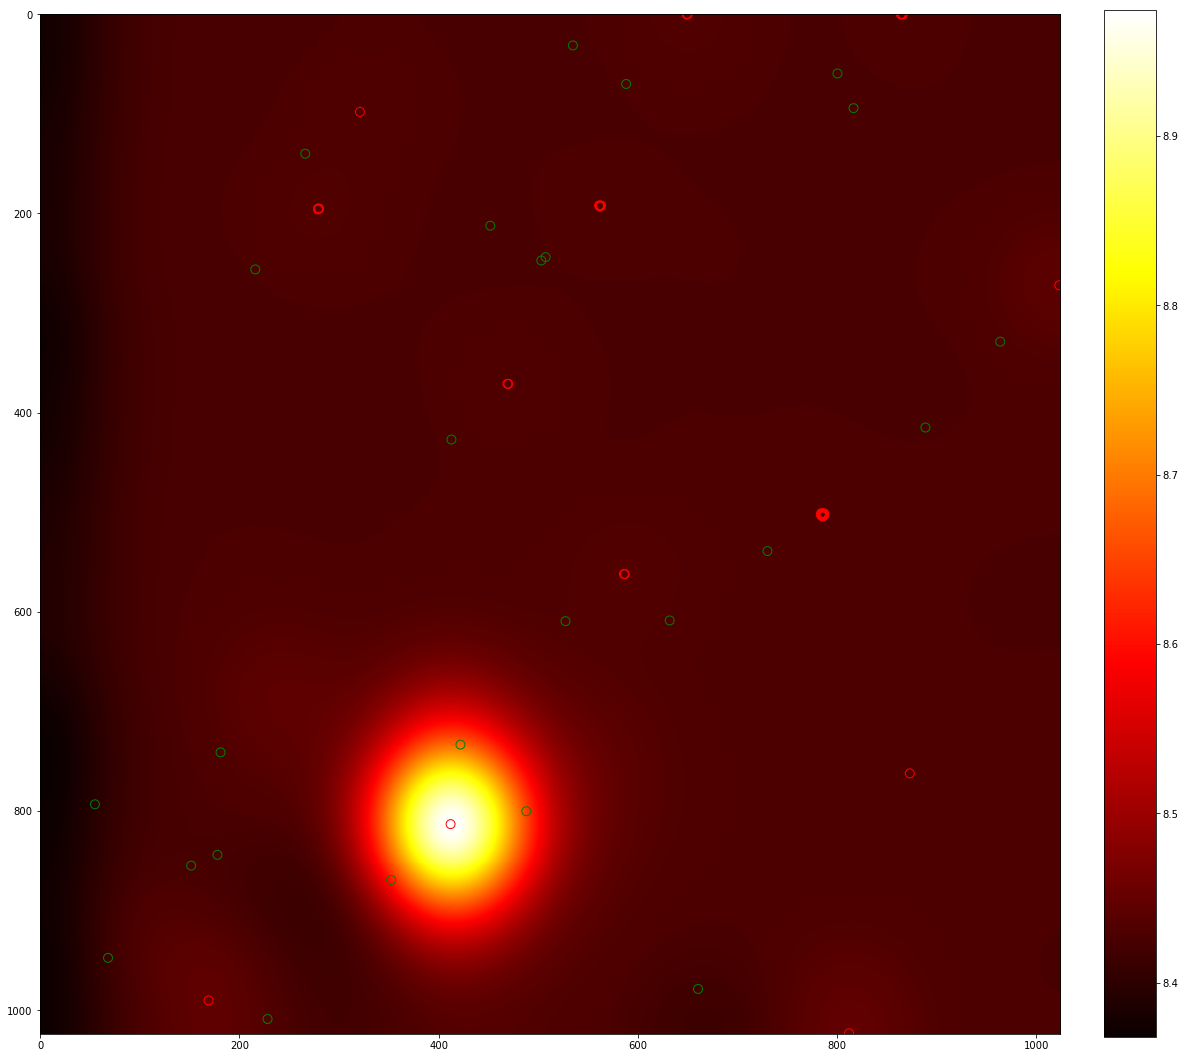

In [147]:
f = plt.figure(figsize=(20,22))
plt.imshow(filtered_image, cmap='hot')
plt.colorbar(fraction=0.046, pad=0.04)
plt.scatter(x1, y1, s=80, facecolors='none', edgecolors='r')
plt.scatter(xpix, ypix, s=80, facecolors='none', edgecolors='g')
#plt.scatter(xpix[17], ypix[17], s=80, facecolors='none', edgecolors='y')
plt.imshow(filtered_image, cmap='hot')
plt.show()

#### Ex. 2 Find the amount of shift needed. 

Match catalogue stars to identified stars and measure amount of shift needed to overlay FoV stars to catalogue.

E.g. Find closest star to one of the Gaia stars near the center of image. Find magnitude of shift. Shift all other Gaia stars and see whether resulting difference is small.

In [ ]:
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###
### code here ###

Shift

In [ ]:
targshifted = centlist[0] + np.array([xshift, yshift])

Convert shifted coordinate into WCS

In [ ]:
wparams, tscoords = load_wcs_from_file(datadir+objname+'_{0:02d}.fits'.format(1), np.array([targshifted[0][0][0]]), np.array([targshifted[0][0][1]]))

## Bonus questions

#### B1. Write a function for centroiding using Gaussian PSF fitting.

#### B2. The stars are actually slightly trailed. How would you fit trailed stars?